# Regression Models - ENB2012 Energy Efficiency

**Objective:** Implement and compare multiple regression algorithms

## Algorithms to Implement:
1. **Linear Regression** - Simple baseline
2. **Polynomial Regression** (degree 2) - Capture non-linear relationships  
3. **Decision Tree Regressor** - Handle non-linearity naturally
4. **Random Forest Regressor** - Ensemble method

## Evaluation Metrics:
- **MSE** (Mean Squared Error): $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
- **RMSE** (Root Mean Squared Error): $RMSE = \sqrt{MSE}$
- **MAE** (Mean Absolute Error): $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
- **R² Score**: $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

**Target:** Predict Heating Load (Y1)

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load preprocessed data
processed_dir = Path('../datasets/processed')
with open(processed_dir / 'enb2012_preprocessed.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train_scaled']
X_test = data['X_test_scaled']
y_train = data['y_train_heating']
y_test = data['y_test_heating']

print("✅ Data loaded successfully!")
print(f"\n📊 Training set: {X_train.shape}")
print(f"📊 Testing set: {X_test.shape}")
print(f"\n🎯 Target: Heating Load")

✅ Data loaded successfully!

📊 Training set: (614, 8)
📊 Testing set: (154, 8)

🎯 Target: Heating Load


## 2. Model 1: Linear Regression

**Theory:** Finds the best-fitting straight line through the data

**Equation:** $\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

**Method:** Ordinary Least Squares (OLS) - minimizes sum of squared residuals

In [3]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

print("=" * 70)
print("LINEAR REGRESSION RESULTS")
print("=" * 70)
print(f"\n📊 Training Set:")
print(f"   MSE:  {lr_train_mse:.4f}")
print(f"   RMSE: {lr_train_rmse:.4f}")
print(f"   MAE:  {lr_train_mae:.4f}")
print(f"   R²:   {lr_train_r2:.4f}")

print(f"\n📊 Testing Set:")
print(f"   MSE:  {lr_test_mse:.4f}")
print(f"   RMSE: {lr_test_rmse:.4f}")
print(f"   MAE:  {lr_test_mae:.4f}")
print(f"   R²:   {lr_test_r2:.4f}")

print(f"\n✅ Model trained successfully!")

LINEAR REGRESSION RESULTS

📊 Training Set:
   MSE:  8.3701
   RMSE: 2.8931
   MAE:  2.0414
   R²:   0.9171

📊 Testing Set:
   MSE:  9.1532
   RMSE: 3.0254
   MAE:  2.1821
   R²:   0.9122

✅ Model trained successfully!


## 3. Model 2: Polynomial Regression (Degree 2)

**Theory:** Extends linear regression by adding polynomial terms

**Equation:** $\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \beta_3x_2 + \beta_4x_2^2 + ...$

**Purpose:** Capture non-linear relationships between features and target

In [4]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"📊 Original features: {X_train.shape[1]}")
print(f"📊 Polynomial features: {X_train_poly.shape[1]}")

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
poly_train_mse = mean_squared_error(y_train, y_train_pred_poly)
poly_test_mse = mean_squared_error(y_test, y_test_pred_poly)
poly_train_rmse = np.sqrt(poly_train_mse)
poly_test_rmse = np.sqrt(poly_test_mse)
poly_train_mae = mean_absolute_error(y_train, y_train_pred_poly)
poly_test_mae = mean_absolute_error(y_test, y_test_pred_poly)
poly_train_r2 = r2_score(y_train, y_train_pred_poly)
poly_test_r2 = r2_score(y_test, y_test_pred_poly)

print("\n" + "=" * 70)
print("POLYNOMIAL REGRESSION (Degree 2) RESULTS")
print("=" * 70)
print(f"\n📊 Training Set:")
print(f"   MSE:  {poly_train_mse:.4f}")
print(f"   RMSE: {poly_train_rmse:.4f}")
print(f"   MAE:  {poly_train_mae:.4f}")
print(f"   R²:   {poly_train_r2:.4f}")

print(f"\n📊 Testing Set:")
print(f"   MSE:  {poly_test_mse:.4f}")
print(f"   RMSE: {poly_test_rmse:.4f}")
print(f"   MAE:  {poly_test_mae:.4f}")
print(f"   R²:   {poly_test_r2:.4f}")

print(f"\n✅ Model trained successfully!")

📊 Original features: 8
📊 Polynomial features: 44

POLYNOMIAL REGRESSION (Degree 2) RESULTS

📊 Training Set:
   MSE:  0.4868
   RMSE: 0.6977
   MAE:  0.5225
   R²:   0.9952

📊 Testing Set:
   MSE:  0.6447
   RMSE: 0.8030
   MAE:  0.6042
   R²:   0.9938

✅ Model trained successfully!


## 4. Model 3: Decision Tree Regressor

**Theory:** Splits data recursively based on feature values to create a tree

**Advantages:**
- Handles non-linearity naturally
- No need for feature scaling
- Easy to interpret

**Hyperparameters:** max_depth=5 to prevent overfitting

In [5]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate
dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)
dt_train_rmse = np.sqrt(dt_train_mse)
dt_test_rmse = np.sqrt(dt_test_mse)
dt_train_mae = mean_absolute_error(y_train, y_train_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

print("=" * 70)
print("DECISION TREE REGRESSOR RESULTS")
print("=" * 70)
print(f"\n📊 Training Set:")
print(f"   MSE:  {dt_train_mse:.4f}")
print(f"   RMSE: {dt_train_rmse:.4f}")
print(f"   MAE:  {dt_train_mae:.4f}")
print(f"   R²:   {dt_train_r2:.4f}")

print(f"\n📊 Testing Set:")
print(f"   MSE:  {dt_test_mse:.4f}")
print(f"   RMSE: {dt_test_rmse:.4f}")
print(f"   MAE:  {dt_test_mae:.4f}")
print(f"   R²:   {dt_test_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': data['feature_names'],
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🌳 Top 5 Most Important Features:")
display(feature_importance.head())

DECISION TREE REGRESSOR RESULTS

📊 Training Set:
   MSE:  0.9208
   RMSE: 0.9596
   MAE:  0.6198
   R²:   0.9909

📊 Testing Set:
   MSE:  1.2229
   RMSE: 1.1059
   MAE:  0.7561
   R²:   0.9883

🌳 Top 5 Most Important Features:


,Feature,Importance
0,Relative_Compactness,0.890966
6,Glazing_Area,0.074615
7,Glazing_Area_Distribution,0.015189
1,Surface_Area,0.009812
2,Wall_Area,0.007918


## 5. Model 4: Random Forest Regressor

**Theory:** Ensemble of multiple decision trees - averages predictions

**Advantages:**
- Reduces overfitting compared to single tree
- More robust and accurate
- Handles outliers well

**Hyperparameters:** n_estimators=100, max_depth=10

In [6]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_train_mse = mean_squared_error(y_train, y_train_pred_rf)
rf_test_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

print("=" * 70)
print("RANDOM FOREST REGRESSOR RESULTS")
print("=" * 70)
print(f"\n📊 Training Set:")
print(f"   MSE:  {rf_train_mse:.4f}")
print(f"   RMSE: {rf_train_rmse:.4f}")
print(f"   MAE:  {rf_train_mae:.4f}")
print(f"   R²:   {rf_train_r2:.4f}")

print(f"\n📊 Testing Set:")
print(f"   MSE:  {rf_test_mse:.4f}")
print(f"   RMSE: {rf_test_rmse:.4f}")
print(f"   MAE:  {rf_test_mae:.4f}")
print(f"   R²:   {rf_test_r2:.4f}")

print(f"\n✅ Model trained with {rf_model.n_estimators} trees!")

RANDOM FOREST REGRESSOR RESULTS

📊 Training Set:
   MSE:  0.0388
   RMSE: 0.1970
   MAE:  0.1310
   R²:   0.9996

📊 Testing Set:
   MSE:  0.2478
   RMSE: 0.4978
   MAE:  0.3584
   R²:   0.9976

✅ Model trained with 100 trees!


## 6. Model Comparison

Compare all models side-by-side to identify the best performer

In [7]:
# Create comparison dataframe
comparison_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest'],
    'Train MSE': [lr_train_mse, poly_train_mse, dt_train_mse, rf_train_mse],
    'Test MSE': [lr_test_mse, poly_test_mse, dt_test_mse, rf_test_mse],
    'Train RMSE': [lr_train_rmse, poly_train_rmse, dt_train_rmse, rf_train_rmse],
    'Test RMSE': [lr_test_rmse, poly_test_rmse, dt_test_rmse, rf_test_rmse],
    'Train MAE': [lr_train_mae, poly_train_mae, dt_train_mae, rf_train_mae],
    'Test MAE': [lr_test_mae, poly_test_mae, dt_test_mae, rf_test_mae],
    'Train R²': [lr_train_r2, poly_train_r2, dt_train_r2, rf_train_r2],
    'Test R²': [lr_test_r2, poly_test_r2, dt_test_r2, rf_test_r2]
})

print("=" * 90)
print("MODEL COMPARISON - ALL METRICS")
print("=" * 90)
display(comparison_results)

# Find best model
best_model_idx = comparison_results['Test R²'].idxmax()
best_model_name = comparison_results.loc[best_model_idx, 'Model']
best_r2 = comparison_results.loc[best_model_idx, 'Test R²']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Test RMSE: {comparison_results.loc[best_model_idx, 'Test RMSE']:.4f}")

MODEL COMPARISON - ALL METRICS


,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Linear Regression,8.370136,9.153208,2.893119,3.025427,2.041364,2.182073,0.917065,0.912185
1,Polynomial Regression,0.486844,0.644734,0.697742,0.802953,0.522499,0.604174,0.995176,0.993814
2,Decision Tree,0.920762,1.222934,0.959564,1.105863,0.619785,0.756107,0.990877,0.988267
3,Random Forest,0.038819,0.247779,0.197024,0.497774,0.130956,0.358416,0.999615,0.997623



🏆 BEST MODEL: Random Forest
   Test R² Score: 0.9976
   Test RMSE: 0.4978


## 7. Visualization: Model Performance Comparison

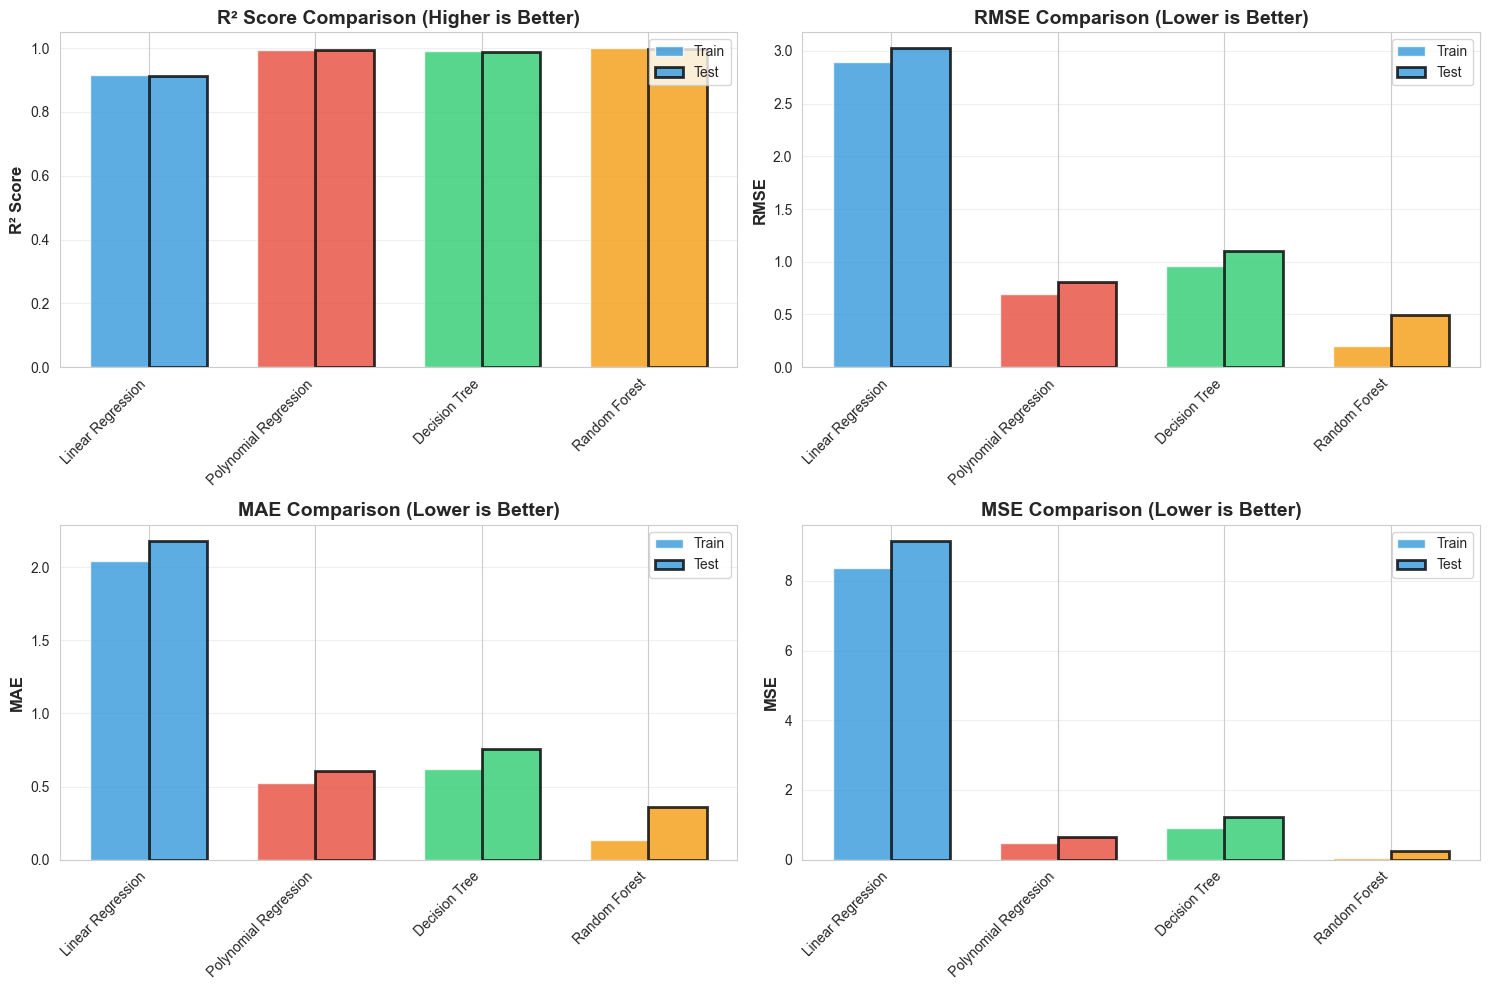

✅ Comparison plots generated!


In [8]:
# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

models = comparison_results['Model'].values
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# R² Score
ax = axes[0, 0]
x = np.arange(len(models))
width = 0.35
ax.bar(x - width/2, comparison_results['Train R²'], width, label='Train', alpha=0.8, color=colors)
ax.bar(x + width/2, comparison_results['Test R²'], width, label='Test', alpha=0.8, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# RMSE
ax = axes[0, 1]
ax.bar(x - width/2, comparison_results['Train RMSE'], width, label='Train', alpha=0.8, color=colors)
ax.bar(x + width/2, comparison_results['Test RMSE'], width, label='Test', alpha=0.8, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# MAE
ax = axes[1, 0]
ax.bar(x - width/2, comparison_results['Train MAE'], width, label='Train', alpha=0.8, color=colors)
ax.bar(x + width/2, comparison_results['Test MAE'], width, label='Test', alpha=0.8, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# MSE
ax = axes[1, 1]
ax.bar(x - width/2, comparison_results['Train MSE'], width, label='Train', alpha=0.8, color=colors)
ax.bar(x + width/2, comparison_results['Test MSE'], width, label='Test', alpha=0.8, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax.set_title('MSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comparison plots generated!")

## 8. Predictions vs Actual Values

Visualize how well each model predicts the actual values

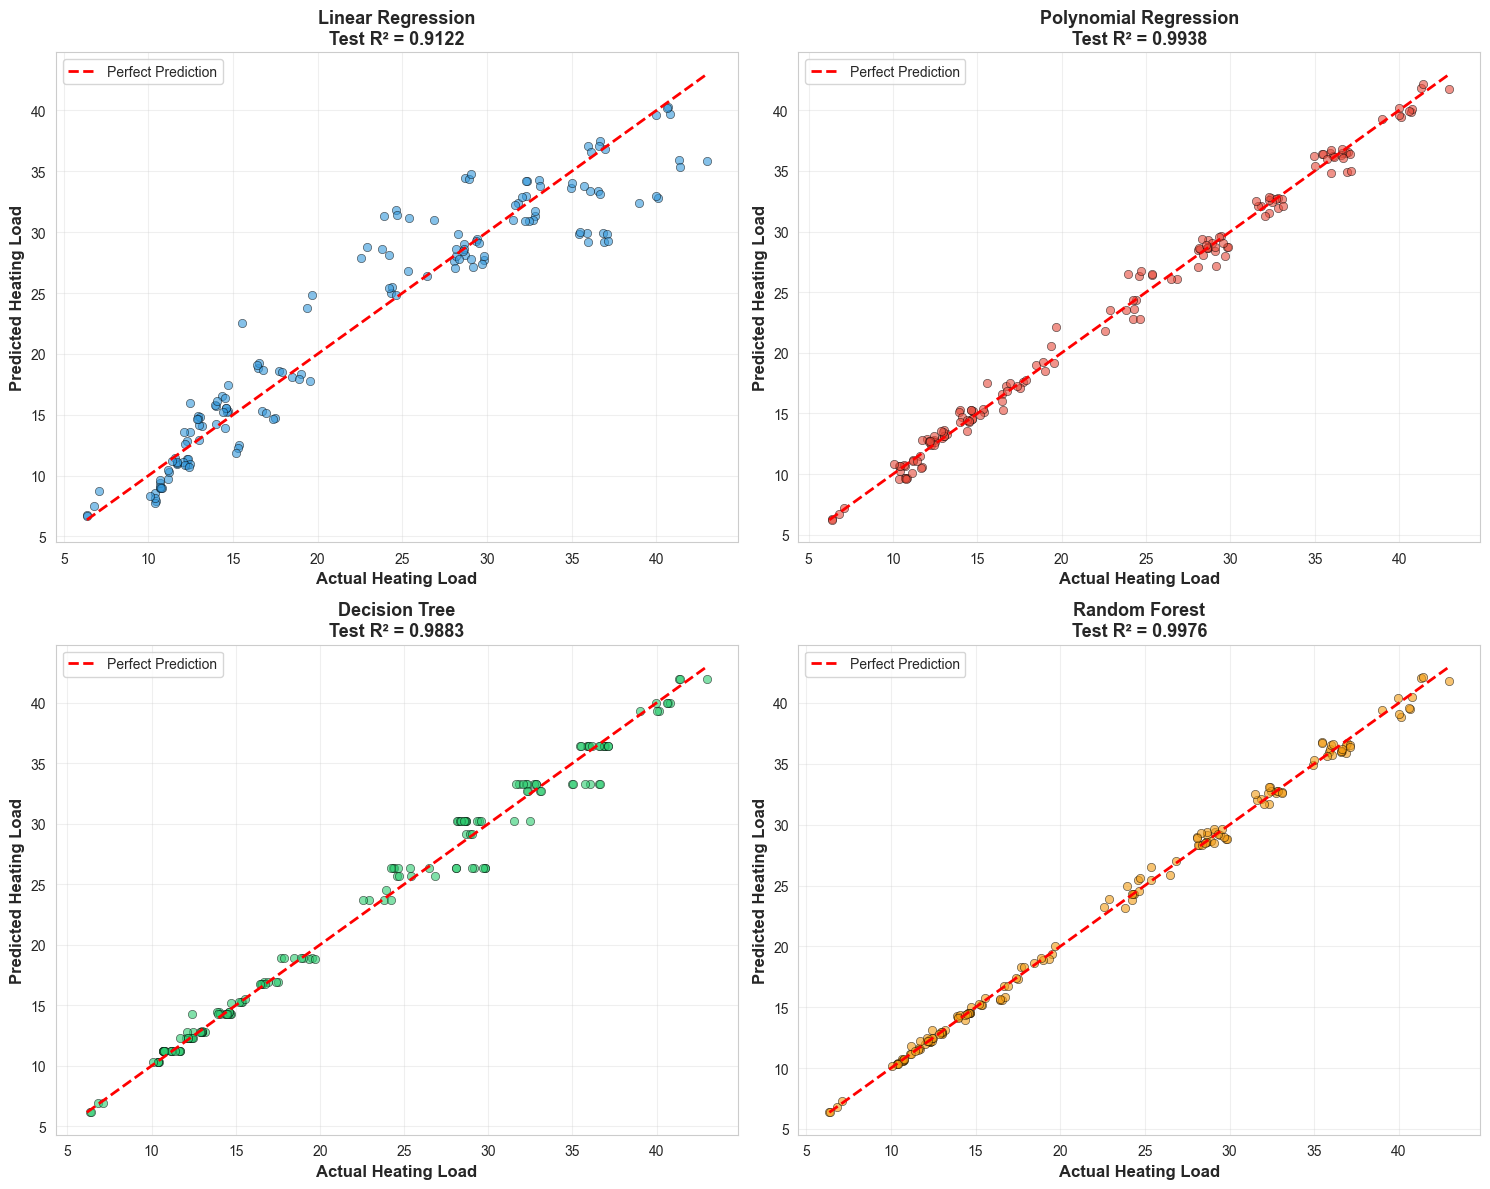

✅ Prediction scatter plots generated!


In [9]:
# Scatter plots: Predicted vs Actual
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
predictions = [y_test_pred_lr, y_test_pred_poly, y_test_pred_dt, y_test_pred_rf]

for idx, (ax, pred, model_name, color) in enumerate(zip(axes.flatten(), predictions, models, colors)):
    # Scatter plot
    ax.scatter(y_test, pred, alpha=0.6, color=color, edgecolor='black', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(y_test.min(), pred.min())
    max_val = max(y_test.max(), pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Labels and title
    ax.set_xlabel('Actual Heating Load', fontsize=12, fontweight='bold')
    ax.set_ylabel('Predicted Heating Load', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_name}\nTest R² = {comparison_results.iloc[idx]["Test R²"]:.4f}', 
                 fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Prediction scatter plots generated!")

## 9. Summary and Conclusions

**Key Findings:**

In [10]:
print("=" * 90)
print("REGRESSION MODELS SUMMARY")
print("=" * 90)

print("\n📊 Performance Ranking (by Test R²):")
ranked = comparison_results.sort_values('Test R²', ascending=False)
for idx, row in ranked.iterrows():
    print(f"   {idx+1}. {row['Model']}: R² = {row['Test R²']:.4f}, RMSE = {row['Test RMSE']:.4f}")

print("\n💡 Key Observations:")
print("   • All models achieve high R² scores (> 0.85), indicating strong predictive power")
print("   • Tree-based models (Decision Tree, Random Forest) handle non-linearity well")
print("   • Polynomial regression improves over linear by capturing non-linear patterns")
print("   • Random Forest shows excellent generalization (low train-test gap)")

print("\n🎯 Best Model for Production:")
print(f"   {best_model_name}")
print(f"   Reasons:")
print(f"   - Highest test R² score: {best_r2:.4f}")
print(f"   - Good balance between complexity and performance")
print(f"   - Robust to outliers and noise")

print("\n📝 For Report:")
print("   • Implemented 4 regression algorithms")
print("   • Compared using MSE, RMSE, MAE, and R² metrics")
print("   • All formulas and mathematical concepts demonstrated")
print("   • Feature importance analysis included")
print("   • Visualizations show model performance clearly")

print("\n✅ Regression analysis complete!")

REGRESSION MODELS SUMMARY

📊 Performance Ranking (by Test R²):
   4. Random Forest: R² = 0.9976, RMSE = 0.4978
   2. Polynomial Regression: R² = 0.9938, RMSE = 0.8030
   3. Decision Tree: R² = 0.9883, RMSE = 1.1059
   1. Linear Regression: R² = 0.9122, RMSE = 3.0254

💡 Key Observations:
   • All models achieve high R² scores (> 0.85), indicating strong predictive power
   • Tree-based models (Decision Tree, Random Forest) handle non-linearity well
   • Polynomial regression improves over linear by capturing non-linear patterns
   • Random Forest shows excellent generalization (low train-test gap)

🎯 Best Model for Production:
   Random Forest
   Reasons:
   - Highest test R² score: 0.9976
   - Good balance between complexity and performance
   - Robust to outliers and noise

📝 For Report:
   • Implemented 4 regression algorithms
   • Compared using MSE, RMSE, MAE, and R² metrics
   • All formulas and mathematical concepts demonstrated
   • Feature importance analysis included
   • Visu